**<h2>Exercise 3.1 : Compute and Plot Received Power(Radar Equation)** </h2>
Let’s assume an airport surveillance radar (like ASR-11) with the following parameters:

- Transmit power: 25 kW  
- Antenna gain: 34 dB  
- Frequency: 2.8 GHz  
- Radar cross section $\sigma$ : $1 \, \text{m}^2$
  
- Antenna losses: 2 dB  
- Atmospheric losses: 0.02 dB/km (one way)<br>
1. Compute and plot the received power as a function of range with a logarithmic scale for the received power.<br>

2. Compute and compare the received power for an insect at a range of 1 km and a jumbo jet at a range of 100 km .Which power is higher?




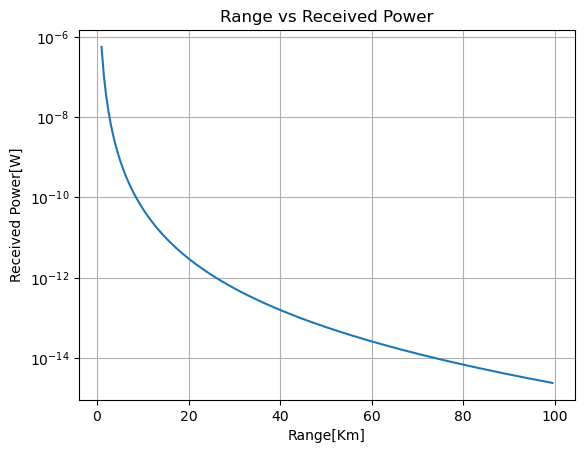

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#1.Received Power
def log(x):
    return np.log10(x)
def dB_to_linear(x,w=1):
    return (10**(x/10))*w
Ptx=10*np.log10(25e3/1e-3)  #db
G=34 #db
F=2.8e9
c=3e8
wavelength=c/F
wavelength=10*log(wavelength)
RCS=10*log(1)
Ant_L=2
Atm_loss_dB_km=0.02
r=np.arange(1.0e3,100.0e3,500)
Atm_loss=2*r/1e3*Atm_loss_dB_km
Prx=Ptx+(2*G)+(2*wavelength)+RCS-(10*log((4*np.pi)**3))-(4*(10*log(r)))-Ant_L-Atm_loss
Prx_watt=dB_to_linear(Prx,1e-3)
# Prx_insect=Ptx+(2*G)+(2*wavelength)+(10*log(1e-5))-(10*log((4*np.pi)**3))-(4*(10*log(1e3)))-Ant_L-Atm_loss
# Prx_jumbo=Ptx+(2*G)+(2*wavelength)+(10*log(1e2))-(10*log((4*np.pi)**3))-(4*(10*log(100e3)))-Ant_L-Atm_loss
plt.plot(r/1000.0,Prx_watt)
plt.xlabel("Range[Km]")
plt.yscale('log')
plt.ylabel("Received Power[W]")
plt.title("Range vs Received Power" )
plt.grid(True)
plt.show()

Use the below table for RCS values of jumbo and insect 

<img src="Screenshot_9-11-2024_22753_.jpeg" width="500" height="300">

In [19]:
#Received Power of Insect and Jumbo using the table above
RCS_insect=-50#dBsm
RCS_jumbo=20  #dBsm
r_insect=1e3
r_jumbo=100e3
Atm_Loss_insect=2*r_insect/1e3*Atm_loss_dB_km
Atm_Loss_jumbo=2*r_jumbo/1e3*Atm_loss_dB_km
Prx=Ptx+(2*G)+(2*wavelength)+RCS-(10*log((4*np.pi)**3))-(4*(10*log(r)))-Ant_L-Atm_loss
Prx_insect=Ptx+(2*G)+(2*wavelength)+RCS_insect-(10*log((4*np.pi)**3))-(4*(10*log(1e3)))-Ant_L-Atm_Loss_insect
Prx_jumbo=Ptx+(2*G)+(2*wavelength)+RCS_jumbo-(10*log((4*np.pi)**3))-(4*(10*log(100e3)))-Ant_L-Atm_Loss_jumbo
Prx_insect_watt=dB_to_linear(Prx_insect,1e-3)
Prx_jumbo_watt=dB_to_linear(Prx_jumbo,1e-3)
print(f"Prx_insect[W]:{Prx_insect_watt}, Prx_insect[dB]:{Prx_insect}")
print(f"Prx_jumbo[W]:{Prx_jumbo_watt}, Prx_jumbo[dB]:{Prx_jumbo}")
print("Prx_insect[W]/Prx_jumbo[W] :",Prx_insect_watt/Prx_jumbo_watt)

Prx_insect[W]:5.704753235748664e-12, Prx_insect[dB]:-82.43763136639366
Prx_jumbo[W]:2.2921174282845747e-13, Prx_jumbo[dB]:-96.39763136639365
Prx_insect[W]/Prx_jumbo[W] : 24.88857318282385


**<h2>Exercise 3.2 : Optimum Filter Bandwidth for Rectangular Pulse** </h2>
Assume that a radar receives a rectangular pulse with a duration of $T_p = 1\mu\text{s}$ and a center frequency of  $ f_0 = 100 \text{MHz}$ that is superimposed by white noise.The radar echo is filtered by an ideal bandpass filter with bandwidth $B$ that is centered around $ f_0 = 100  \text{MHz}$.(Assume Sampling Frequency $f_s=1\text{GHz}$).<br>

How should the filter bandwidth 𝐵 be chosen such that the peak magnitude of the filter response has a maximum signal-to-noise ratio?



2.0616525061865637e-07
1.3571428571428572


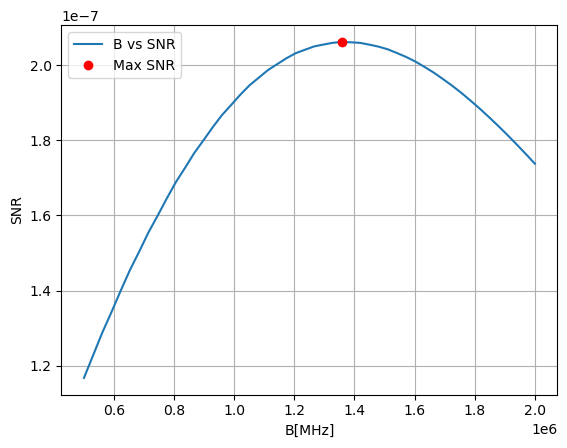

In [ ]:
fs=1e9
f0=100e6
Ts=1/fs
Tp=1e-6
t=np.arange(-1e-3,1e-3,Ts)

def filt_resp(t,B,f0,Tp):
    dt=t[1]-t[0]
    rect_t=np.where(np.abs(t)<Tp/2,1,0)
    x_t=np.cos(2*np.pi*f0*t)
    pulse=rect_t*x_t
    pulse_f=np.fft.fftshift(np.fft.fft(pulse))
    f=np.fft.fftshift(np.fft.fftfreq(pulse_f.size,dt))
    H_f=np.where(np.abs(f-f0)<B/2,1,0)
    Y_f=pulse_f*H_f
    y_t=np.fft.ifft(Y_f)
    return y_t
N_B=50
B=np.linspace(0.5/Tp,2/Tp,N_B)
max_resp_magnitude=np.zeros(B.size)
for i in range(B.size):
    max_resp_magnitude[i]=(np.max(np.abs(filt_resp(t,B[i],f0,Tp))))
max_SNR_mag=np.argmax(max_resp_magnitude**2/B)
optimal_bandwidth=(B*Tp)[max_SNR_mag]
print((max_resp_magnitude**2/B)[max_SNR_mag])
print((B*Tp)[max_SNR_mag])
plt.plot(B*Tp*1e6,max_resp_magnitude**2/B,label="B vs SNR")
plt.grid()
plt.xlabel("B[MHz]")
plt.ylabel("SNR")
plt.plot(optimal_bandwidth * 1e6, (max_resp_magnitude**2/B)[max_SNR_mag], 'ro', label='Max SNR')
plt.legend()
plt.show()

**<h2>Exercise 3.3 :Matched Filter for White Noise** </h2>
Assume a radar that transmits a rectangular pulse with a duration of  $T_p = 1$  $\mu$ s . The radar pulse is scattered by a single object and the associated radar echo is received with a power of $P_{Rx}$ = $5 \cdot 10^{-13} W$ .

1. What is the SNR after applying a matched filter in the receiver if the system noise temperature is $T_s = 800K $?

2. Simulate the received signal before and after applying the matched filter by performing the following steps:
<br>
&nbsp;&nbsp;&nbsp;&nbsp;**a)** Generate a long time vector (e.g. from $-100 T_p$  to  $100 T_p$ with a sampling frequency of $f_s = 1 GHz$.
<br>
&nbsp;&nbsp;&nbsp;&nbsp;**b)** Generate the received radar pulse for a carrier frequency of $f_0 = 100 MHz$. The amplitude is  A =$ \sqrt {2 P_{Rx}}$ (input resistance of 1 $\Omega$).
<br>
&nbsp;&nbsp;&nbsp;&nbsp;**c)** Generate a Gaussian white noise signal having a power spectral density of $N_w = k T_s$ (hint: the noise variance is $\sigma^2 = k T_s \cdot f_s$).
<br>
&nbsp;&nbsp;&nbsp;&nbsp;**d)** Add the white noise to the previously computed radar echo and plot the contaminated signal. Can you see the radar echo?
<br>
&nbsp;&nbsp;&nbsp;&nbsp;**e)** Apply the matched filter and plot the filtered signal. Is it now visible?
<br>

3. Compute the SNR from the data and compare it to the theoretical value.

The value of SNR as per theory is : 16.560009309428384 dB


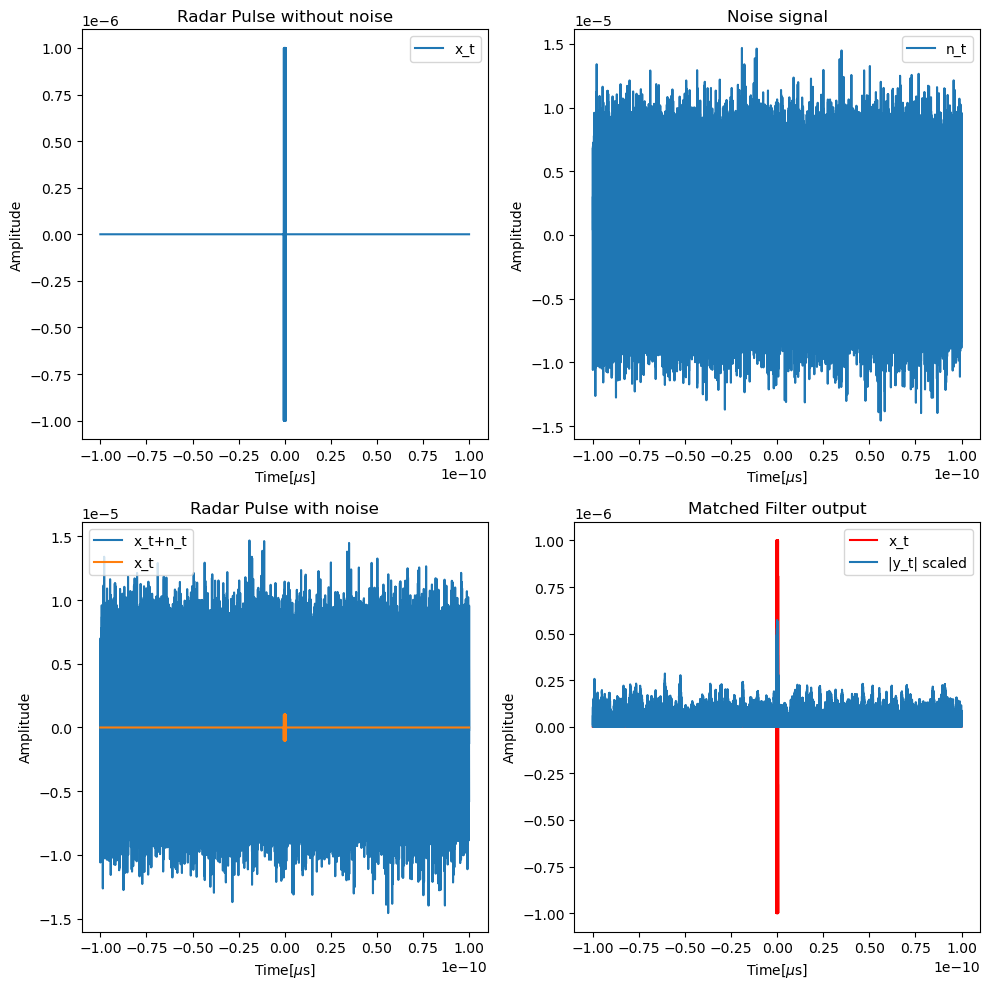

The value of SNR as per practical data is : 17.551489359459566 dB


In [56]:
import numpy as np 
import matplotlib.pyplot as plt
np.random.seed(20)

T_s=800           #System Noise Temperature (K)
P_rx=5e-13        #Received Power(W)
Tp=1e-6           #Pulse width (s)
fs=1e9            #Sampling frequency(Hz)
f0=100e6          #Carrier frequency of the radar pulse(Hz)  
A=np.sqrt(2*P_rx) #Amplitude
k=1.38e-23    # Boltzmann Constant 

def linear_to_dB(x):
    return 10*np.log10(x)

def noise_powerspectraldensity(T_s):
    return k*T_s

def pulse(t,A,Tp,f0):
    pulse=np.where(np.abs(t)<Tp/2,A*np.cos(2*np.pi*f0*t),0)
    return pulse

def white_noise(t,noise_psd):
    n=np.sqrt(noise_psd*fs)*np.random.randn(t.size)
    return n

def matched_filter(x):
    h=np.conjugate(x[::-1])
    return h

def filter_response(x_t,h_t):
    X_f=np.fft.fft(x_t)
    H_f=np.fft.fft(h_t)
    y_t=np.fft.ifft(X_f*H_f)
    return np.fft.ifftshift(y_t)

def SNR_theoretical(P_rx,Tp,Noise_power):
    Signal_power=P_rx*Tp
    return Signal_power/Noise_power

def SNR_data(y_t):
    Signal_power=np.max(np.abs(y_t)**2)
    Noise_power=np.mean(np.abs(y_t[2000:-2000])**2)
    return Signal_power/Noise_power

Tmin=-100*Tp
Tmax=100*Tp
Ts=1/fs    #Sampling time (s)

t=np.arange(Tmin,Tmax,Ts)
noise_psd=noise_powerspectraldensity(T_s)
x_t=pulse(t,A,Tp,f0)
n_t=white_noise(t,noise_psd)
x_t_with_noise=x_t+n_t
h_t=matched_filter(x_t)
y_t=filter_response(x_t_with_noise,h_t)

#1
SNR_theory=SNR_theoretical(P_rx,Tp,noise_psd)
print(f"The value of SNR as per theory is : {linear_to_dB(SNR_theory)} dB")

#2
fig,axs=plt.subplots(2,2,figsize=(10,10))
axs[0,0].plot(t/1e6,np.real(x_t),label="x_t")
axs[0,0].set_xlabel("Time[$\mu$s]")
axs[0,0].set_ylabel("Amplitude")
axs[0,0].set_title("Radar Pulse without noise")
axs[0,1].plot(t/1e6,np.real(n_t),label="n_t")
axs[0,1].set_xlabel("Time[$\mu$s]")
axs[0,1].set_ylabel("Amplitude")
axs[0,1].set_title("Noise signal")
axs[1,0].plot(t/1e6,np.real(x_t_with_noise),label="x_t+n_t")
axs[1,0].plot(t/1e6,np.real(x_t),label="x_t")
axs[1,0].set_xlabel("Time[$\mu$s]")
axs[1,0].set_ylabel("Amplitude")
axs[1,0].set_title("Radar Pulse with noise")
axs[1,1].plot(t/1e6,np.real(x_t),label="x_t",color='red')
axs[1,1].plot(t/1e6,np.abs(y_t)*1e3,label="|y_t| scaled")

axs[1,1].set_xlabel("Time[$\mu$s]")
axs[1,1].set_ylabel("Amplitude")
axs[1,1].set_title("Matched Filter output")
for ax in axs.flat:
    ax.legend()
    #ax.autoscale(True)
plt.tight_layout()
plt.show()

#3
SNR_practical=SNR_data(y_t)
print(f"The value of SNR as per practical data is : {linear_to_dB(SNR_practical)} dB")

**<h2>Exercise 3.4 :Matched Filter for Coloured Noise** </h2>
Assume now that the radar from the previous simulation receives in addition to the white noise also a narrowband interference signal with a power of $P_{inf}$ = $1 \cdot 10^{-10} W$. The interference has a bandwidth of $𝐵_{𝑖𝑛𝑓}$ = 1 MHz with a uniformly distributed power spectral density between 98 MHz and 99 MHz.<br>
<br>
1.Build up on your previous simulations and compute again the received signal before and after applying a matched filter:
<br>
&nbsp;&nbsp;&nbsp;&nbsp;**a)** Generate for the interference an additional Gaussian noise signal that has a constant power spectral density of $𝑁_{𝑖𝑛𝑓} =P_{inf}/2𝐵_{𝑖𝑛𝑓}$ within 98 MHz and &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp; 99MHz.The interference may, e.g., be generated by applying an ideal bandpass filter to a white noise signal.
<br>
&nbsp;&nbsp;&nbsp;&nbsp;**b)** Add the interference noise to the previously computed white noise and plot again the contaminated radar echo. Can you see the transmitted radar pulse?
<br>
&nbsp;&nbsp;&nbsp;&nbsp;**c)** Apply again the old matched filter, which accounts only for the white 
noise, and plot the filtered signal. Is the radar pulse visible?
<br>
&nbsp;&nbsp;&nbsp;&nbsp; **d)** Apply now a new matched filter which accounts for both the white 
noise and the interference. Is the radar pulse now visible?


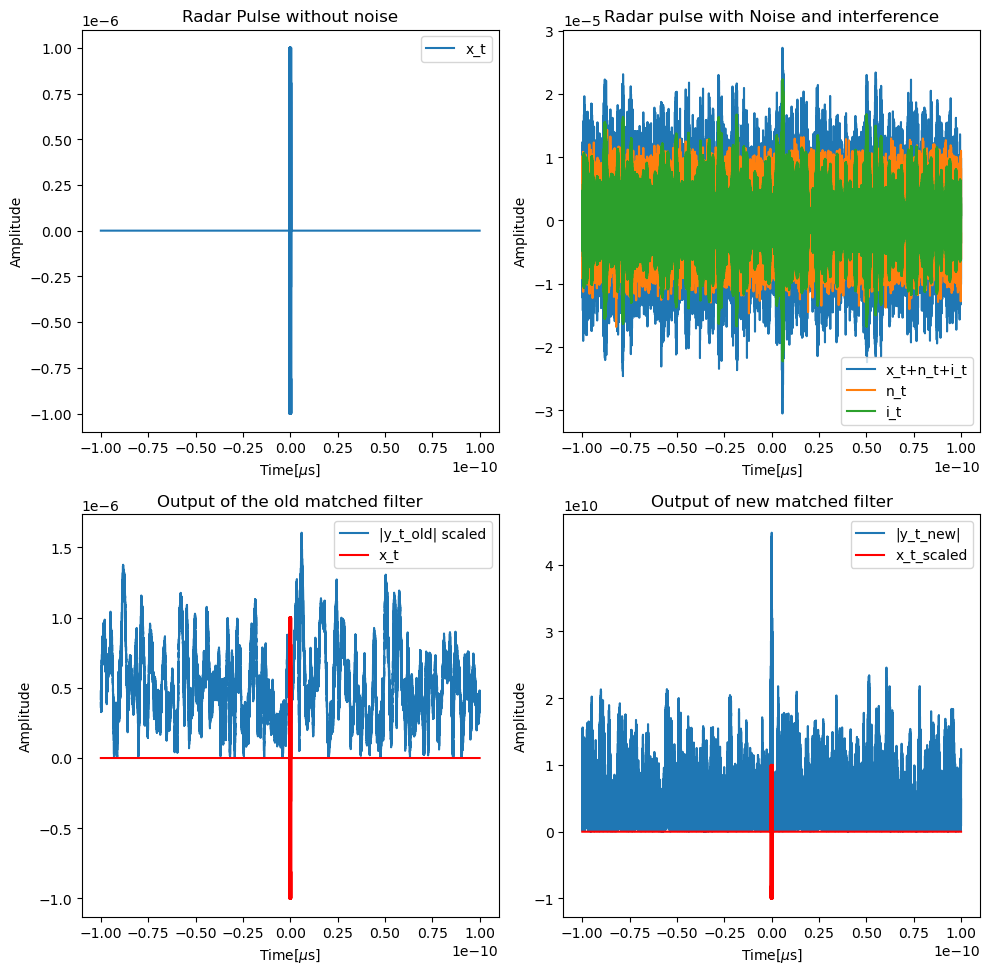

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
np.random.seed(22)
T_s=800           #System Noise Temperature (K)
P_rx=5e-13        #Received Power(W)
Tp=1e-6           #Pulse width (s)
fs=1e9            #Sampling frequency(Hz)
f0=100e6          #Carrier frequency of the radar pulse(Hz)  
A=np.sqrt(2*P_rx) #Amplitude
k=1.38e-23    # Boltzmann Constant
P_interference= 1e-10   #Interference power[W]
BW_interference=1e6     #Interference Bandwidth[Hz]
f_interfernce=((98+99)/2)*1e6   #Interference Center frequency [Hz]

def noise_powerspectraldensity(T_s):
    return k*T_s

def interference_powerspectraldensity(P_inf,B_inf):
    interference_power=P_inf/(2*B_inf)
    return interference_power

def pulse(t,A,Tp,f0):
    pulse=np.where(np.abs(t)<Tp/2,A*np.cos(2*np.pi*f0*t),0)
    return pulse

def white_noise(t,noise_psd):
    n=np.sqrt(noise_psd*fs)*np.random.randn(t.size)
    return n

def bandpassfilter(f,B_int,f_int):
    return np.where(np.abs(f-f_int)<B_int/2,1,0)

def interference(t,P_int,B_int,f_int,Ts):
    psd_int=interference_powerspectraldensity(P_int,B_int)
    f=np.fft.fftfreq(np.size(t),Ts)
    bpf=bandpassfilter(f,B_int,f_int)
    n=white_noise(t,psd_int)
    interference=np.fft.ifft(np.fft.fft(n)*bpf)
    interference=np.fft.ifftshift(interference)
    return interference


def matched_filter_old(x):
    h=np.conjugate(x[::-1])
    return h

def matched_filter_new(x,noise_psd,interference_psd,Bp_filter):
    h_num=np.fft.fft(np.conjugate(x[::-1]))
    h_denom=noise_psd+interference_psd*Bp_filter
    h=h_num/h_denom
    h=np.fft.ifft(h)
    return h

def filter_response(x_t,h_t):
    X_f=np.fft.fft(x_t)
    H_f=np.fft.fft(h_t)
    y_t=np.fft.ifft(X_f*H_f)
    return np.fft.ifftshift(y_t)

Tmin=-100*Tp
Tmax=100*Tp
Ts=1/fs 

t=np.arange(Tmin,Tmax,Ts)
f=np.fft.fftfreq(np.size(t),Ts)
noise_psd=noise_powerspectraldensity(T_s)
interference_psd=interference_powerspectraldensity(P_interference,BW_interference)
x_t=pulse(t,A,Tp,f0)
n_t=white_noise(t,noise_psd)
i_t=interference(t,P_interference,BW_interference,f_interfernce,Ts)
x_t_with_noise_and_interference=x_t+n_t+i_t
h_old_t=matched_filter_old(x_t)
h_new_t=matched_filter_new(x_t,noise_psd,interference_psd,bandpassfilter(f,BW_interference,f_interfernce))
y_t_old=filter_response(x_t_with_noise_and_interference,h_old_t)
y_t_new=filter_response(x_t_with_noise_and_interference,h_new_t)

fig,axs=plt.subplots(2,2,figsize=(10,10))
axs[0,0].plot(t/1e6,np.real(x_t),label="x_t")
axs[0,0].set_xlabel("Time[$\mu$s]")
axs[0,0].set_ylabel("Amplitude")
axs[0,0].set_title("Radar Pulse without noise")

axs[0,1].plot(t/1e6,np.real(x_t_with_noise_and_interference),label="x_t+n_t+i_t")
axs[0,1].plot(t/1e6,np.real(n_t),label="n_t")
axs[0,1].plot(t/1e6,np.real(i_t),label="i_t")
axs[0,1].set_xlabel("Time[$\mu$s]")
axs[0,1].set_ylabel("Amplitude")
axs[0,1].set_title("Radar pulse with Noise and interference")

axs[1,0].plot(t/1e6,np.abs(y_t_old)*1e3,label="|y_t_old| scaled")
axs[1,0].plot(t/1e6,np.real(x_t),label="x_t",color='red')
axs[1,0].set_xlabel("Time[$\mu$s]")
axs[1,0].set_ylabel("Amplitude")
axs[1,0].set_title("Output of the old matched filter")


axs[1,1].plot(t/1e6,np.abs(y_t_new),label="|y_t_new|")
axs[1,1].plot(t/1e6,np.real(x_t)*1e16,label="x_t_scaled",color='red')
axs[1,1].set_xlabel("Time[$\mu$s]")
axs[1,1].set_ylabel("Amplitude")
axs[1,1].set_title("Output of new matched filter")

for ax in axs.flat:
    ax.legend()
    ax.autoscale(True)
plt.tight_layout()
plt.show()

